In [1]:
import cv2
import os 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [2]:
train_dir = 'D:/DL/Transfer learning with MobileNet v2/dataset/Train'
test_dir = 'D:/DL/Transfer learning with MobileNet v2/dataset/Test'
val_dir = 'D:/DL/Transfer learning with MobileNet v2/dataset/Validation'

In [3]:
IMG_SIZE = 256
train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_dir, label_mode='categorical', image_size=(IMG_SIZE, IMG_SIZE), batch_size=32)
print(train_ds.class_names)

Found 10000 files belonging to 2 classes.
['WithMask', 'WithoutMask']


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(val_dir, label_mode='categorical', image_size=(IMG_SIZE, IMG_SIZE), batch_size=32)

Found 800 files belonging to 2 classes.


In [5]:
model = Sequential([
    tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_shape=(256,256,3), pooling='avg', classes=2),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(2, activation = 'softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 22,852,898
Trainable params: 22,818,466
Non-trainable params: 34,432
_________________________________________________________________


In [7]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.categorical_crossentropy,
    metrics = ['accuracy']
)

In [8]:

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs = 5
)

Epoch 1/5
313/313 [==============================] - 103s 293ms/step - loss: 0.0640 - accuracy: 0.9803 - val_loss: 59.9071 - val_accuracy: 0.3462
Epoch 2/5
313/313 [==============================] - 91s 291ms/step - loss: 0.0390 - accuracy: 0.9888 - val_loss: 0.0451 - val_accuracy: 0.9900
Epoch 3/5
313/313 [==============================] - 91s 292ms/step - loss: 0.0228 - accuracy: 0.9927 - val_loss: 0.0275 - val_accuracy: 0.9925
Epoch 4/5
313/313 [==============================] - 93s 295ms/step - loss: 0.0346 - accuracy: 0.9897 - val_loss: 0.0225 - val_accuracy: 0.9887
Epoch 5/5
313/313 [==============================] - 91s 291ms/step - loss: 0.0339 - accuracy: 0.9905 - val_loss: 0.4398 - val_accuracy: 0.9275


1/1 [==============================] - 0s 25ms/step
WithoutMask
99.9998927116394 %


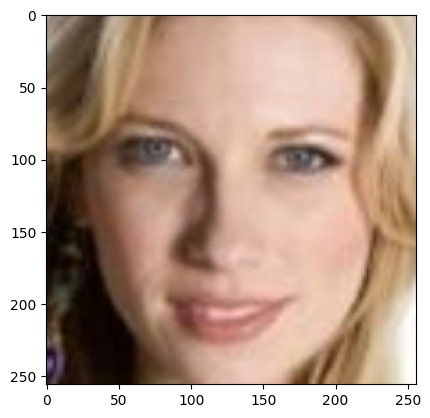

In [14]:
PATH = 'D:/DL/Transfer learning with MobileNet v2/dataset/Test/WithoutMask/187.png'
image = cv2.imread(PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (256,256))
plt.imshow(image)
image = np.expand_dims(image, axis=0)
pred = model.predict(image)
i = np.argmax(pred[0])
print(train_ds.class_names[i])
print(max(pred[0])*100,'%')